In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv("10-diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df[df["z"]==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
df = df.drop(df[df["z"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["x"]==0].index)

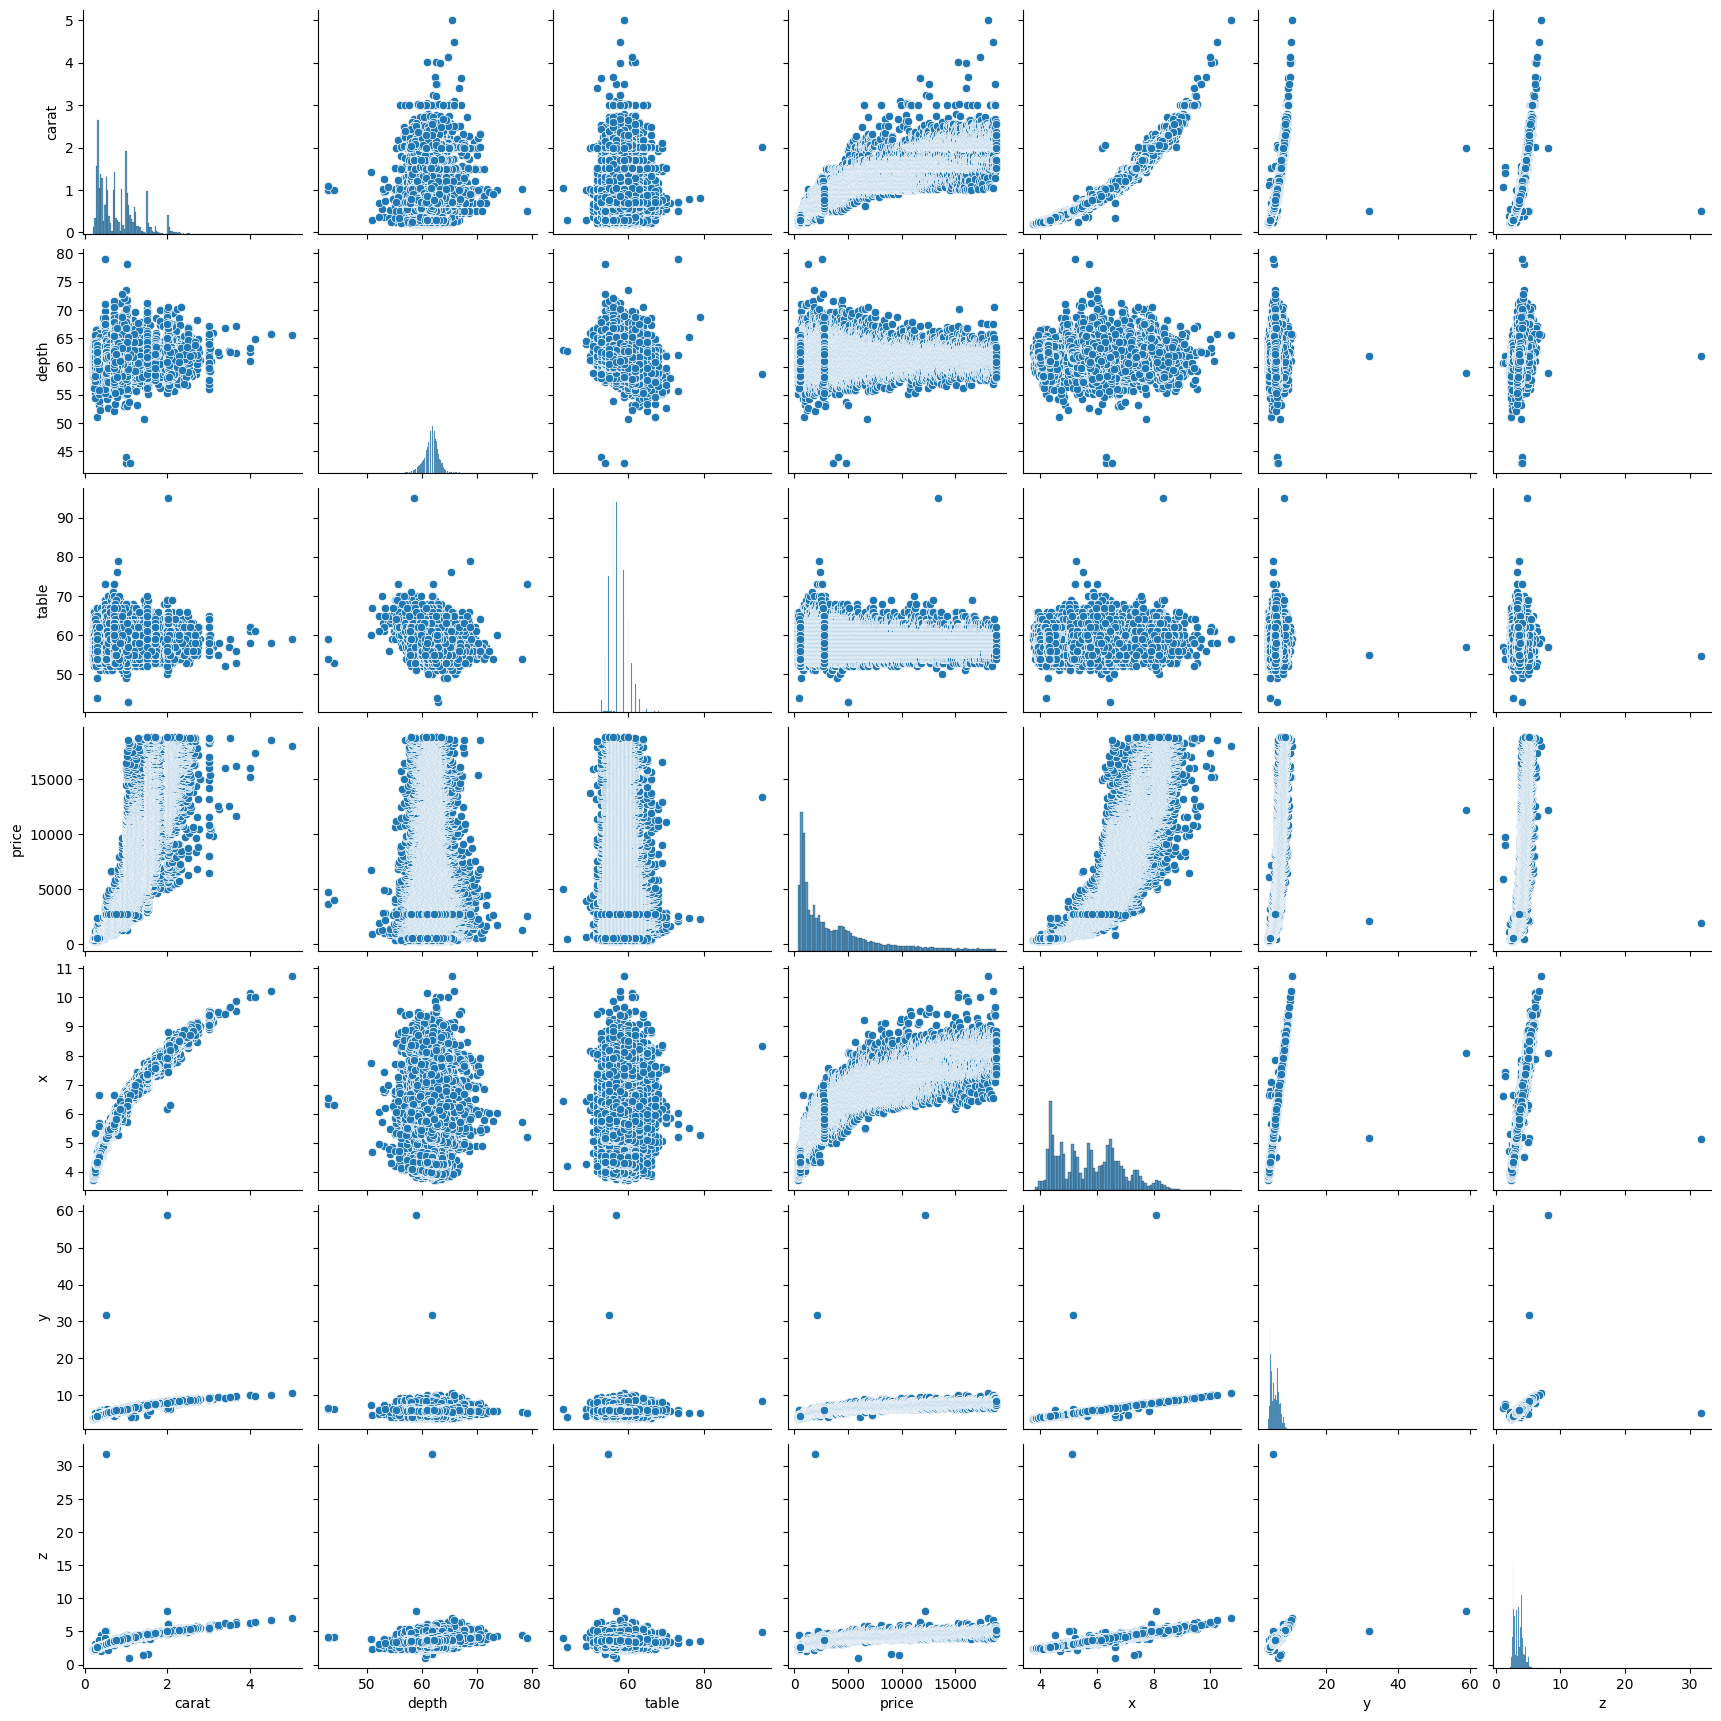

In [12]:
sns.pairplot(df)
plt.show()

In [14]:
df = df[(df["depth"]<75)&(df["depth"]> 45)]
df = df[(df["table"]<75)&(df["table"]> 40)]
df = df[(df["z"]<30)&(df["z"]> 2)]
df = df[df["y"]<20]

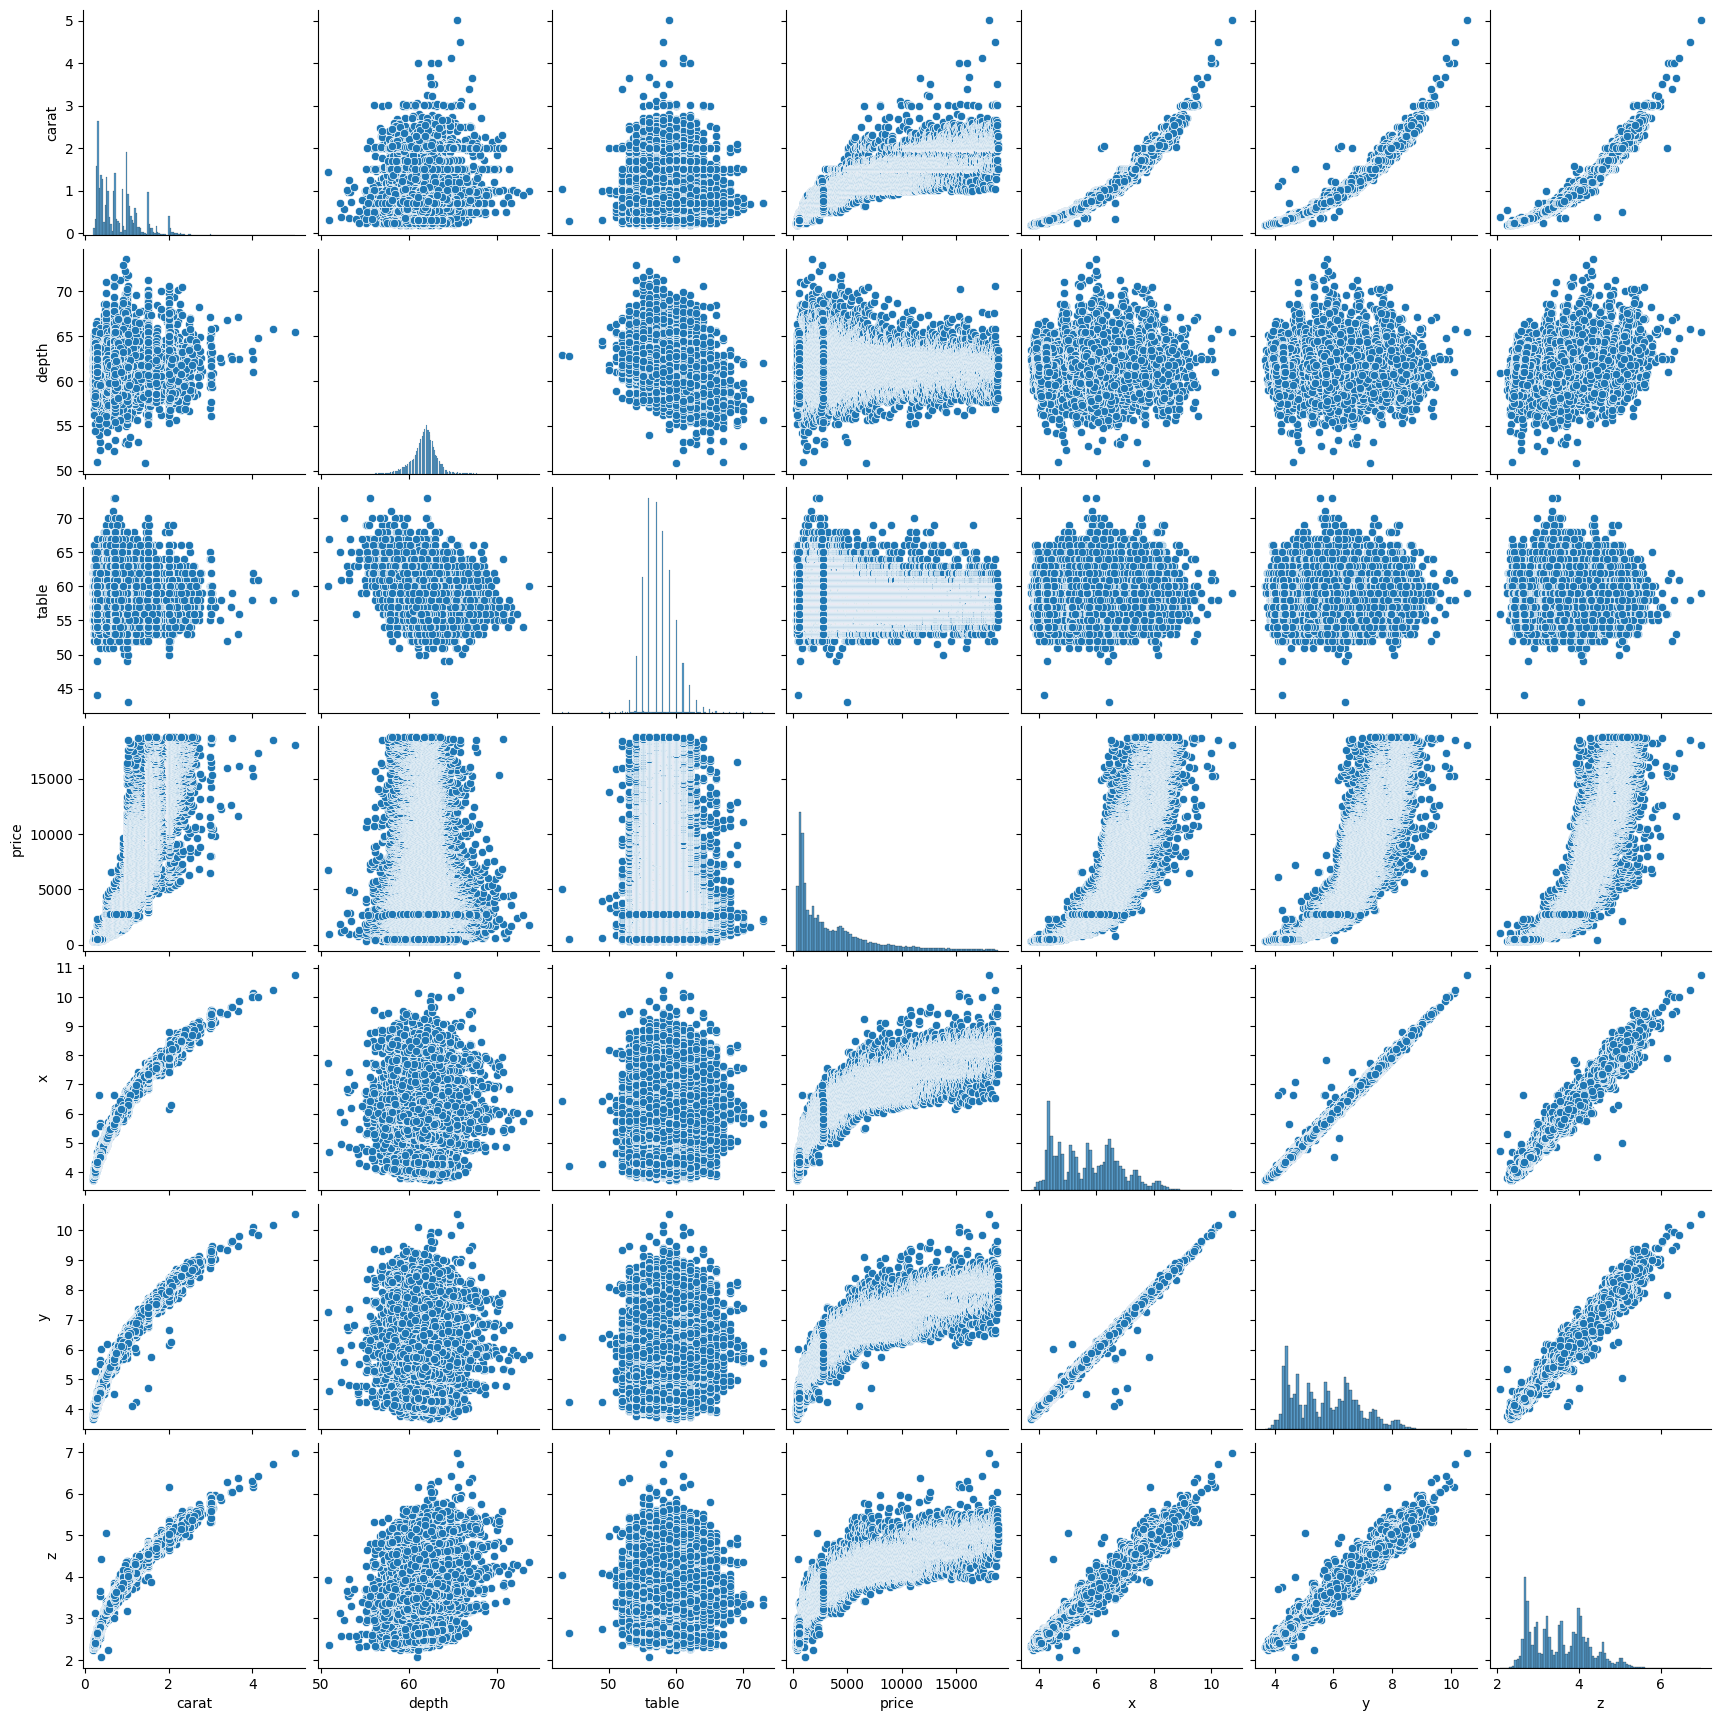

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
df["cut"].value_counts()

cut
Ideal        21543
Premium      13779
Very Good    12080
Good          4902
Fair          1601
Name: count, dtype: int64

In [18]:
df["clarity"].value_counts()

clarity
SI1     13058
VS2     12250
SI2      9183
VS1      8167
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64

In [19]:
df["color"].value_counts()

color
G    11281
E     9792
F     9535
H     8296
D     6774
I     5420
J     2807
Name: count, dtype: int64

In [20]:
X = df.drop("price",axis = 1)
y= df["price"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()

In [35]:
for col in ["cut", "color", "clarity"]:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [46]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("score: ",score)

mae:  867.7716773299013
mse:  1849507.2709594548
score:  0.8848902306205187


In [47]:
from sklearn.svm import SVR

In [48]:
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("score: ",score)

mae:  1397.853335232954
mse:  8151981.896752332
score:  0.4926363519327641


In [51]:
# hyperparameter
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    "C" : [0.1, 1, 10, 100, 1000],
    "kernel" : ["rbf","linear"],
    "gamma" : [1,0.1,0.01]
}

In [53]:
grid = GridSearchCV(estimator=SVR(),param_grid=param_grid, n_jobs=-1,verbose=3)

In [54]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

In [ ]:
y_pred = grid.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("score: ",score)